In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Import pandas
import datetime
import pandas as pd
import matplotlib.pyplot as plt
# Read Excel file with multiple sheets
xls = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/1. MRW PointTransaction 2023_Installed workshop_Final.xlsx", sheet_name=['Transaction', 'Garange Profile', 'SKU_point_Ltr', 'User'])

# Access individual sheets using sheet names
TRA_df = xls['Transaction']
GP_df = xls['Garange Profile']
SKU_df = xls['SKU_point_Ltr']
USER_df = xls['User']

In [ ]:
TRA_df.head()

,Distributor,ProductName,ProductSKU,ScanDate,UserId
0,B,Mobil Super AIO - Charcoal,Mobil Super AIO - 7L,2023-11-29,EXL_1692444744991
1,B,Mobil Super AIO - Charcoal,Mobil Super AIO - 7L,2023-11-29,EXL_1692444744991
2,B,Mobil Super AIO - Charcoal,Mobil Super AIO - 7L,2023-11-29,EXL_1692444744991
3,B,Mobil Super AIO - Charcoal,Mobil Super AIO - 7L,2023-11-29,EXL_1692444744991
4,B,Mobil Super AIO - Charcoal,Mobil Super AIO - 7L,2023-11-29,EXL_1692444744991


In [ ]:
GP_df.head()

,OwnerId,Postcode,Province,District,Distributor
0,EXL_1692444744991,72000.0,สุพรรณบุรี,เขตศรีประจันต์,B
1,EXL_1651745414431,57120.0,เชียงราย,เขตพาน,C
2,EXL_1574261647294,10530.0,กรุงเทพมหานคร,เขตหนองจอก,A
3,EXL_1573728830730,10270.0,สมุทรปราการ,เขตเมืองสมุทรปราการ,A
4,EXL_1594802722891,30000.0,นครราชสีมา,เขตเมืองนครราชสีมา,A


In [ ]:
SKU_df

,ProductSKU,Points,Volume (L)
0,Mobil 1 Gold 4L - 6L,60,6
1,Silver - Large 4L,50,4
2,Gold - Large 4L,50,4
3,Mobil Super AIO - 7L,45,7
4,Mobil Super AIO 3L - 6L,40,5
5,Charcoal - Large 4L - 5L,40,5
6,Mobil Super FF 4L - 7L,35,6
7,Mobil Delvac Modern 7L,20,7
8,Blue - Large 4L - 5L,15,5
9,Mobil_Delvac_Legend_6L_-_7L,10,7


In [ ]:
USER_df.head()

,UserId,GarageId,UserType
0,EXL_1569429819465,TX4276,Owner
1,EXL_1569431062769,IP0146,Owner
2,EXL_1569431134633,AF0708,Employee
3,EXL_1569431146924,TX4276,Employee
4,EXL_1569432034271,TX4276,Employee


In [ ]:
garage_map_df = pd.merge(GP_df, USER_df, how='left', left_on='OwnerId', right_on='UserId')
garage_map_df.drop(columns=['UserId','UserType','OwnerId','Distributor'], inplace=True)
garage_map_df.columns = garage_map_df.columns.str.strip()
garage_map_df

,Postcode,Province,District,GarageId
0,72000.0,สุพรรณบุรี,เขตศรีประจันต์,AA3539
1,57120.0,เชียงราย,เขตพาน,AA3755
2,10530.0,กรุงเทพมหานคร,เขตหนองจอก,AA6105
3,10270.0,สมุทรปราการ,เขตเมืองสมุทรปราการ,AB0842
4,30000.0,นครราชสีมา,เขตเมืองนครราชสีมา,AB3319
...,...,...,...,...
4001,30310.0,นครราชสีมา,เขตเมืองนครราชสีมา,ZZ5588
4002,56130.0,พะเยา,เขตแม่ใจ,ZZ5616
4003,25110.0,ปราจีนบุรี,เขตกบินทร์บุรี,ZZ7220
4004,10240.0,กรุงเทพมหานคร,เขตสะพานสูง,ZZ7365


#Feature Engineering

In [ ]:
df = pd.merge(TRA_df, SKU_df, how='left', on='ProductSKU')
df = pd.merge(df, USER_df, how='left', on='UserId')
df = pd.merge(df, garage_map_df, on='GarageId', how='left')
df

,Distributor,ProductName,ProductSKU,ScanDate,UserId,Points,Volume (L),GarageId,UserType,Postcode,Province,District
0,B,Mobil Super AIO - Charcoal,Mobil Super AIO - 7L,2023-11-29,EXL_1692444744991,45,7,AA3539,Owner,72000.0,สุพรรณบุรี,เขตศรีประจันต์
1,B,Mobil Super AIO - Charcoal,Mobil Super AIO - 7L,2023-11-29,EXL_1692444744991,45,7,AA3539,Owner,72000.0,สุพรรณบุรี,เขตศรีประจันต์
2,B,Mobil Super AIO - Charcoal,Mobil Super AIO - 7L,2023-11-29,EXL_1692444744991,45,7,AA3539,Owner,72000.0,สุพรรณบุรี,เขตศรีประจันต์
3,B,Mobil Super AIO - Charcoal,Mobil Super AIO - 7L,2023-11-29,EXL_1692444744991,45,7,AA3539,Owner,72000.0,สุพรรณบุรี,เขตศรีประจันต์
4,B,Mobil Super AIO - Charcoal,Mobil Super AIO - 7L,2023-11-29,EXL_1692444744991,45,7,AA3539,Owner,72000.0,สุพรรณบุรี,เขตศรีประจันต์
...,...,...,...,...,...,...,...,...,...,...,...,...
215651,C,Mobil Super FF,Mobil Super FF 4L - 7L,2023-06-19,EXL_1686836958772,35,6,ZY1293,Owner,57000.0,เชียงราย,เขต
215652,C,Mobil Super FF,Mobil Super FF 4L - 7L,2023-06-19,EXL_1686836958772,35,6,ZY1293,Owner,57000.0,เชียงราย,เขต
215653,C,Mobil Super FF,Mobil Super FF 4L - 7L,2023-06-19,EXL_1686836958772,35,6,ZY1293,Owner,57000.0,เชียงราย,เขต
215654,C,Mobil Super FF,Mobil Super FF 4L - 7L,2023-06-15,EXL_1686836958772,35,6,ZY1293,Owner,57000.0,เชียงราย,เขต


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215656 entries, 0 to 215655
Data columns (total 12 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Distributor  215656 non-null  object        
 1   ProductName  215656 non-null  object        
 2   ProductSKU   215656 non-null  object        
 3   ScanDate     215656 non-null  datetime64[ns]
 4   UserId       215656 non-null  object        
 5   Points       215656 non-null  int64         
 6   Volume (L)   215656 non-null  int64         
 7   GarageId     215656 non-null  object        
 8   UserType     215656 non-null  object        
 9   Postcode     213449 non-null  float64       
 10  Province     215656 non-null  object        
 11  District     215656 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(8)
memory usage: 19.7+ MB


In [ ]:
nan_values = df.isnull().sum()

print(nan_values)

Distributor       0
ProductName       0
ProductSKU        0
ScanDate          0
UserId            0
Points            0
Volume (L)        0
GarageId          0
UserType          0
Postcode       2207
Province          0
District          0
dtype: int64


In [ ]:
df['ScanDate'] = pd.to_datetime(df['ScanDate'])
df['ScanDate'].describe()

count                           215656
mean     2023-07-17 00:49:35.138183168
min                2023-01-01 00:00:00
25%                2023-04-13 00:00:00
50%                2023-07-19 00:00:00
75%                2023-10-27 00:00:00
max                2023-12-31 00:00:00
Name: ScanDate, dtype: object

In [ ]:
def order_cluster(cluster_field_name, target_field_name,df,ascending):
    new_cluster_field_name = 'new_' + cluster_field_name
    df_new = df.groupby(cluster_field_name)[target_field_name].mean().reset_index()
    df_new = df_new.sort_values(by=target_field_name,ascending=ascending).reset_index(drop=True)
    df_new['index'] = df_new.index
    df_final = pd.merge(df,df_new[[cluster_field_name,'index']], on=cluster_field_name)
    df_final = df_final.drop([cluster_field_name],axis=1)
    df_final = df_final.rename(columns={"index":cluster_field_name})
    return df_final

In [ ]:
data = pd.DataFrame(df['GarageId'].unique())
data.columns = ['GarageId']
data

,GarageId
0,AA3539
1,AC9774
2,AD4164
3,AD8175
4,AE5085
...,...
1315,ZW4233
1316,ZW4865
1317,ZX4127
1318,ZX7225


In [ ]:
df_Q1 = df.loc[df['ScanDate'].dt.quarter == 1]
tx_max_purchase_Q1 = df_Q1.groupby('GarageId').ScanDate.max().reset_index()
tx_max_purchase_Q1.columns = ['GarageId','MaxPurchaseDate_Q1']
tx_max_purchase_Q1['Recency_Q1'] = (datetime.datetime(2023, 3, 31) - tx_max_purchase_Q1['MaxPurchaseDate_Q1']).dt.days
data = pd.merge(data, tx_max_purchase_Q1, on='GarageId', how='left')
data['Recency_Q1'].fillna((datetime.datetime(2023, 3, 31) - datetime.datetime(2023, 1, 1)).days,inplace=True)

df_Q2 = df.loc[df['ScanDate'].dt.quarter == 2]
tx_max_purchase_Q2 = df_Q2.groupby('GarageId').ScanDate.max().reset_index()
tx_max_purchase_Q2.columns = ['GarageId','MaxPurchaseDate_Q2']
tx_max_purchase_Q2['Recency_Q2'] = (datetime.datetime(2023, 6, 30) - tx_max_purchase_Q2['MaxPurchaseDate_Q2']).dt.days
data = pd.merge(data, tx_max_purchase_Q2, on='GarageId', how='left')
data['Recency_Q2'].fillna((datetime.datetime(2023, 6, 30) - datetime.datetime(2023, 4, 1)).days,inplace=True)

df_Q3 = df.loc[df['ScanDate'].dt.quarter == 3]
tx_max_purchase_Q3 = df_Q3.groupby('GarageId').ScanDate.max().reset_index()
tx_max_purchase_Q3.columns = ['GarageId','MaxPurchaseDate_Q3']
tx_max_purchase_Q3['Recency_Q3'] = (datetime.datetime(2023, 9, 30) - tx_max_purchase_Q3['MaxPurchaseDate_Q3']).dt.days
data = pd.merge(data, tx_max_purchase_Q3, on='GarageId', how='left')
data['Recency_Q3'].fillna((datetime.datetime(2023, 9, 30) - datetime.datetime(2023, 7, 1)).days,inplace=True)

df_Q4 = df.loc[df['ScanDate'].dt.quarter == 4]
tx_max_purchase_Q4 = df_Q4.groupby('GarageId').ScanDate.max().reset_index()
tx_max_purchase_Q4.columns = ['GarageId','MaxPurchaseDate_Q4']
tx_max_purchase_Q4['Recency_Q4'] = (datetime.datetime(2023, 12, 31) - tx_max_purchase_Q4['MaxPurchaseDate_Q4']).dt.days
data = pd.merge(data, tx_max_purchase_Q4, on='GarageId', how='left')
data['Recency_Q4'].fillna((datetime.datetime(2023, 12, 31) - datetime.datetime(2023, 10, 1)).days,inplace=True)
data['Recency'] = (data['Recency_Q1'] + data['Recency_Q2'] + data['Recency_Q3'] + data['Recency_Q4'])/4
data = data.drop(['Recency_Q1', 'Recency_Q2', 'Recency_Q3', 'Recency_Q4', 'MaxPurchaseDate_Q1', 'MaxPurchaseDate_Q2', 'MaxPurchaseDate_Q3', 'MaxPurchaseDate_Q4'], axis=1)
data

,GarageId,Recency
0,AA3539,62.00
1,AC9774,19.25
2,AD4164,11.50
3,AD8175,14.25
4,AE5085,15.00
...,...,...
1315,ZW4233,67.00
1316,ZW4865,59.75
1317,ZX4127,7.75
1318,ZX7225,70.50


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

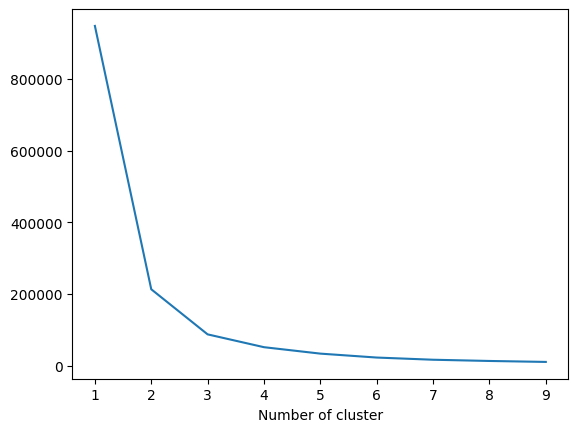

In [ ]:
from sklearn.cluster import KMeans
sse={}
tx_Recency = data[['Recency']]
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(tx_Recency)
    tx_Recency["clusters"] = kmeans.labels_
    sse[k] = kmeans.inertia_
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.show()

In [ ]:
# Applying k-Means
kmeans=KMeans(n_clusters=4)
data['RecencyCluster']=kmeans.fit_predict(data[['Recency']])

#order the frequency cluster
data = order_cluster('RecencyCluster', 'Recency', data, False )
data.groupby('RecencyCluster')['Recency'].describe()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,count,mean,std,min,25%,50%,75%,max
RecencyCluster,,,,,,,,
0,407.0,75.628993,7.149547,63.50,69.50,74.25,81.500,90.25
1,295.0,51.152542,6.220477,40.50,46.00,50.75,56.375,63.25
2,261.0,29.740421,5.965679,19.75,24.75,29.50,34.750,40.25
3,357.0,9.658263,5.395244,0.00,5.25,9.25,14.250,19.50


In [ ]:
tx_frequency = df.groupby('GarageId').ScanDate.count().reset_index()
tx_frequency.columns = ['GarageId','Frequency']
tx_frequency['Frequency'] = tx_frequency['Frequency'] / 4
tx_frequency

,GarageId,Frequency
0,AA3539,8.00
1,AC9774,9.75
2,AD4164,22.00
3,AD8175,30.50
4,AE5085,20.00
...,...,...
1315,ZW4233,3.25
1316,ZW4865,6.25
1317,ZX4127,24.50
1318,ZX7225,15.75


In [ ]:
tx_frequency.sort_values(by='Frequency', ascending=False)

,GarageId,Frequency
1139,WH4482,677.25
452,IT8259,629.75
421,IB0726,625.00
173,DJ6751,576.75
493,JT8450,572.00
...,...,...
426,IE5702,0.25
1072,VB4946,0.25
437,IJ0100,0.25
450,IS4433,0.25


In [ ]:
data = pd.merge(data, tx_frequency, on='GarageId')
data

,GarageId,Recency,RecencyCluster,Frequency
0,AA3539,62.00,1,8.00
1,AF3356,45.75,1,17.00
2,AF8522,54.25,1,8.50
3,AH9568,52.00,1,111.00
4,AI1156,49.50,1,43.50
...,...,...,...,...
1315,YV1705,20.00,2,43.75
1316,YZ4268,29.75,2,32.25
1317,ZA7480,20.00,2,29.50
1318,ZO7507,20.50,2,44.75


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-54-9cd8d0324290>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tx_frequency["clusters"] = kmeans.labels_
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-54-9cd8d0324290>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] 

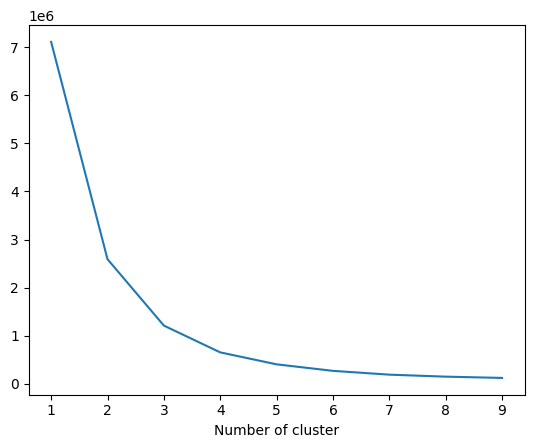

In [ ]:
from sklearn.cluster import KMeans

sse={}
tx_frequency = data[['Frequency']]
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(tx_frequency)
    tx_frequency["clusters"] = kmeans.labels_
    sse[k] = kmeans.inertia_
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.show()

In [ ]:
# Applying k-Means
kmeans=KMeans(n_clusters=4)
data['FrequencyCluster']=kmeans.fit_predict(data[['Frequency']])

#order the frequency cluster
data = order_cluster('FrequencyCluster', 'Frequency', data, True )
data.groupby('FrequencyCluster')['Frequency'].describe()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,count,mean,std,min,25%,50%,75%,max
FrequencyCluster,,,,,,,,
0,1014.0,13.130671,13.146061,0.25,2.2500,8.250,20.1875,48.50
1,229.0,84.625546,29.212120,49.25,61.0000,75.000,106.0000,152.75
2,64.0,224.222656,54.750609,157.25,180.6875,206.375,247.8125,355.75
3,13.0,528.461538,88.103919,397.25,475.0000,528.250,576.7500,677.25


In [ ]:
data

,GarageId,Recency,RecencyCluster,Frequency,FrequencyCluster
0,AA3539,62.00,1,8.00,0
1,AF3356,45.75,1,17.00,0
2,AF8522,54.25,1,8.50,0
3,AI1156,49.50,1,43.50,0
4,AK2474,54.75,1,8.00,0
...,...,...,...,...,...
1315,WH4482,0.25,3,677.25,3
1316,XM6230,13.00,3,556.50,3
1317,ZB1266,1.25,3,475.00,3
1318,NW8593,67.75,0,411.75,3


In [ ]:
tx_revenue = df.groupby('GarageId').Points.sum().reset_index()
tx_revenue['Points'] = tx_revenue['Points'] / 4
tx_revenue.rename(columns={'Points': 'Revenue'}, inplace=True)
tx_revenue

,GarageId,Revenue
0,AA3539,360.00
1,AC9774,337.50
2,AD4164,801.25
3,AD8175,992.50
4,AE5085,596.25
...,...,...
1315,ZW4233,118.75
1316,ZW4865,162.50
1317,ZX4127,1018.75
1318,ZX7225,458.75


In [ ]:
#merge it with our main dataframe
data = pd.merge(data, tx_revenue, on='GarageId')
data

,GarageId,Recency,RecencyCluster,Frequency,FrequencyCluster,Revenue
0,AA3539,62.00,1,8.00,0,360.00
1,AF3356,45.75,1,17.00,0,602.50
2,AF8522,54.25,1,8.50,0,325.00
3,AI1156,49.50,1,43.50,0,1622.50
4,AK2474,54.75,1,8.00,0,280.00
...,...,...,...,...,...,...
1315,WH4482,0.25,3,677.25,3,23966.25
1316,XM6230,13.00,3,556.50,3,19842.50
1317,ZB1266,1.25,3,475.00,3,15837.50
1318,NW8593,67.75,0,411.75,3,12251.25


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-59-57f5b7d8310b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tx_revenue["clusters"] = kmeans.labels_
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-59-57f5b7d8310b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

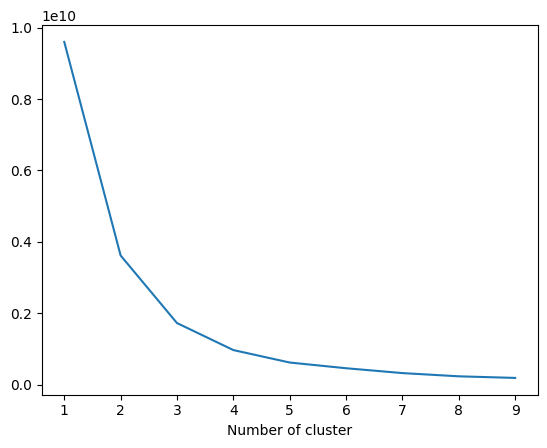

In [ ]:
sse={} # error
tx_revenue = data[['Revenue']]
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(tx_revenue)
    tx_revenue["clusters"] = kmeans.labels_
    sse[k] = kmeans.inertia_
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.show()

In [ ]:
#apply clustering
kmeans = KMeans(n_clusters=4)
data['RevenueCluster'] = kmeans.fit_predict(data[['Revenue']])

#order the cluster numbers
data = order_cluster('RevenueCluster', 'Revenue',data,True)

#show details of the dataframe
data.groupby('RevenueCluster')['Revenue'].describe()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,count,mean,std,min,25%,50%,75%,max
RevenueCluster,,,,,,,,
0,1014.0,434.977811,439.686599,2.50,75.3125,276.875,694.375,1651.25
1,222.0,2881.936937,1007.781562,1656.25,2100.3125,2610.625,3446.250,5251.25
2,73.0,7919.897260,2084.202233,5412.50,6363.7500,7260.000,9028.750,13398.75
3,11.0,20693.636364,4866.297664,15100.00,17949.3750,19366.250,22493.125,31697.50


In [ ]:
data

,GarageId,Recency,RecencyCluster,Frequency,FrequencyCluster,Revenue,RevenueCluster
0,AA3539,62.00,1,8.00,0,360.00,0
1,AF3356,45.75,1,17.00,0,602.50,0
2,AF8522,54.25,1,8.50,0,325.00,0
3,AI1156,49.50,1,43.50,0,1622.50,0
4,AK2474,54.75,1,8.00,0,280.00,0
...,...,...,...,...,...,...,...
1315,RH6974,10.00,3,430.00,3,15100.00,3
1316,RJ0000,12.00,3,475.00,3,17897.50,3
1317,WH4482,0.25,3,677.25,3,23966.25,3
1318,XM6230,13.00,3,556.50,3,19842.50,3


In [ ]:
#calculate overall score and use mean() to see details
data['OverallScore'] = data['RecencyCluster'] + data['FrequencyCluster'] + data['RevenueCluster']
data.groupby('OverallScore')[['Recency','Frequency','Revenue']].mean()

,Recency,Frequency,Revenue
OverallScore,,,
0,75.820707,5.263889,180.195707
1,51.573000,13.896000,463.795000
2,32.781726,21.975888,758.153553
3,16.971429,32.780952,1061.928571
4,24.443333,75.250000,2617.316667
5,12.195652,96.280435,3383.989130
6,15.608696,177.043478,6579.239130
7,10.392045,248.142045,8832.727273
9,8.900000,543.600000,20155.250000


In [ ]:
data

,GarageId,Recency,RecencyCluster,Frequency,FrequencyCluster,Revenue,RevenueCluster,OverallScore
0,AA3539,62.00,1,8.00,0,360.00,0,1
1,AF3356,45.75,1,17.00,0,602.50,0,1
2,AF8522,54.25,1,8.50,0,325.00,0,1
3,AI1156,49.50,1,43.50,0,1622.50,0,1
4,AK2474,54.75,1,8.00,0,280.00,0,1
...,...,...,...,...,...,...,...,...
1315,RH6974,10.00,3,430.00,3,15100.00,3,9
1316,RJ0000,12.00,3,475.00,3,17897.50,3,9
1317,WH4482,0.25,3,677.25,3,23966.25,3,9
1318,XM6230,13.00,3,556.50,3,19842.50,3,9


#K-Mean for High/Mid/Low

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

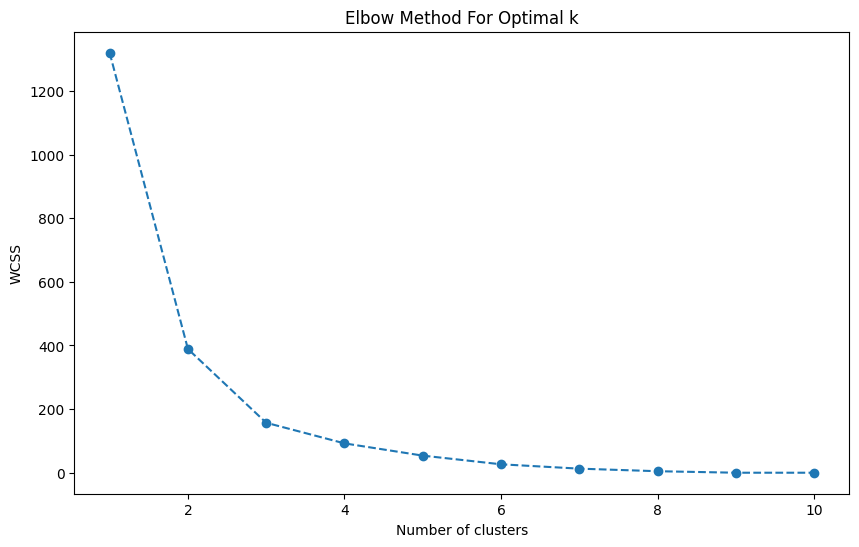

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Extract the OverallScore column
Overall = data[['OverallScore']]

# Normalize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(Overall)

# Determine the optimal number of clusters using the elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot the elbow method graph
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')  # Within-cluster sum of squares
plt.show()

In [ ]:
# Let's assume the optimal number of clusters is 3 based on the elbow plot
kmeans = KMeans(n_clusters=3, random_state=0)
clusters = kmeans.fit_predict(X_scaled)

# Add the cluster labels to the original DataFrame
data['Cluster'] = clusters

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
data

,GarageId,Recency,RecencyCluster,Frequency,FrequencyCluster,Revenue,RevenueCluster,OverallScore,Cluster
0,AA3539,62.00,1,8.00,0,360.00,0,1,0
1,AF3356,45.75,1,17.00,0,602.50,0,1,0
2,AF8522,54.25,1,8.50,0,325.00,0,1,0
3,AI1156,49.50,1,43.50,0,1622.50,0,1,0
4,AK2474,54.75,1,8.00,0,280.00,0,1,0
...,...,...,...,...,...,...,...,...,...
1315,RH6974,10.00,3,430.00,3,15100.00,3,9,2
1316,RJ0000,12.00,3,475.00,3,17897.50,3,9,2
1317,WH4482,0.25,3,677.25,3,23966.25,3,9,2
1318,XM6230,13.00,3,556.50,3,19842.50,3,9,2


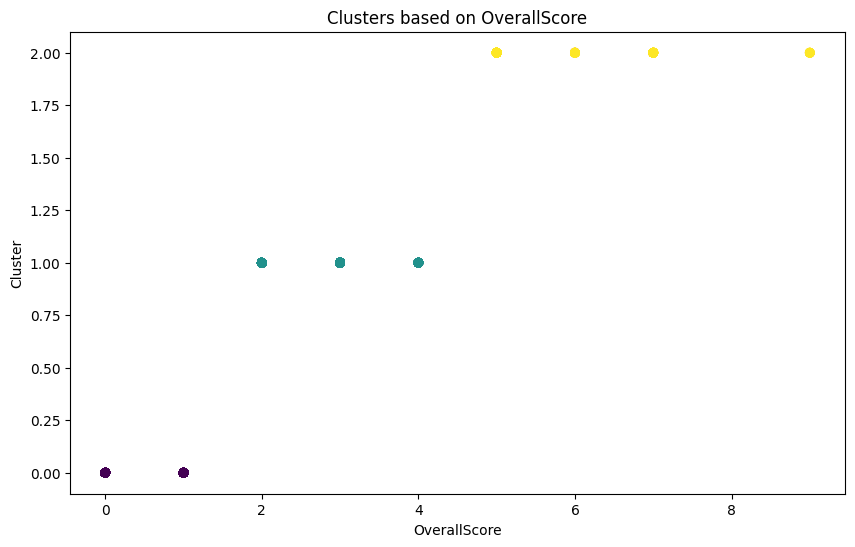

In [ ]:
# Visualize the clusters
plt.figure(figsize=(10, 6))
plt.scatter(data['OverallScore'], data['Cluster'], c=clusters, cmap='viridis')
plt.title('Clusters based on OverallScore')
plt.xlabel('OverallScore')
plt.ylabel('Cluster')
plt.show()

In [ ]:
mapping = {0: 'Low-Value', 1: 'Mid-Value', 2: 'High-Value'}
data['MappedCluster'] = data['Cluster'].map(mapping)
data

,GarageId,Recency,RecencyCluster,Frequency,FrequencyCluster,Revenue,RevenueCluster,OverallScore,Cluster,MappedCluster
0,AA3539,62.00,1,8.00,0,360.00,0,1,0,Low-Value
1,AF3356,45.75,1,17.00,0,602.50,0,1,0,Low-Value
2,AF8522,54.25,1,8.50,0,325.00,0,1,0,Low-Value
3,AI1156,49.50,1,43.50,0,1622.50,0,1,0,Low-Value
4,AK2474,54.75,1,8.00,0,280.00,0,1,0,Low-Value
...,...,...,...,...,...,...,...,...,...,...
1315,RH6974,10.00,3,430.00,3,15100.00,3,9,2,High-Value
1316,RJ0000,12.00,3,475.00,3,17897.50,3,9,2,High-Value
1317,WH4482,0.25,3,677.25,3,23966.25,3,9,2,High-Value
1318,XM6230,13.00,3,556.50,3,19842.50,3,9,2,High-Value


<ipython-input-77-712c41f60624>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cluster_counts.index, y=cluster_counts.values, palette='viridis')


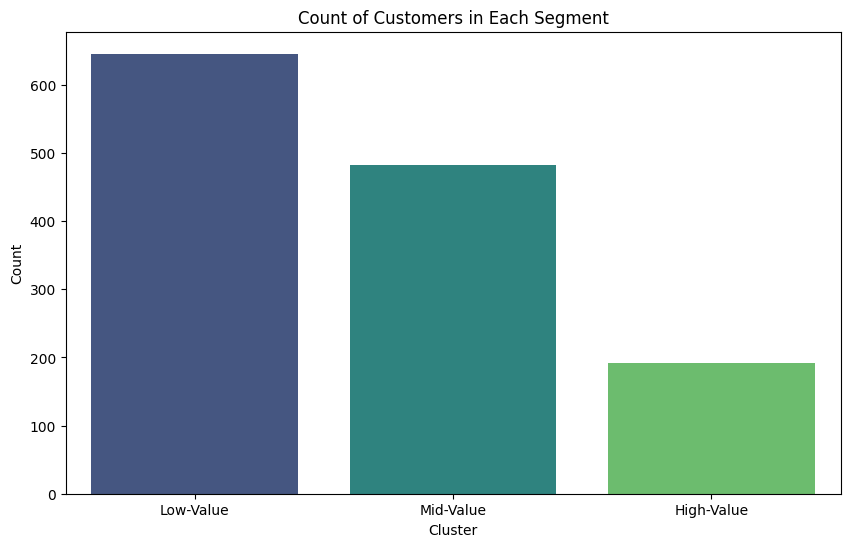

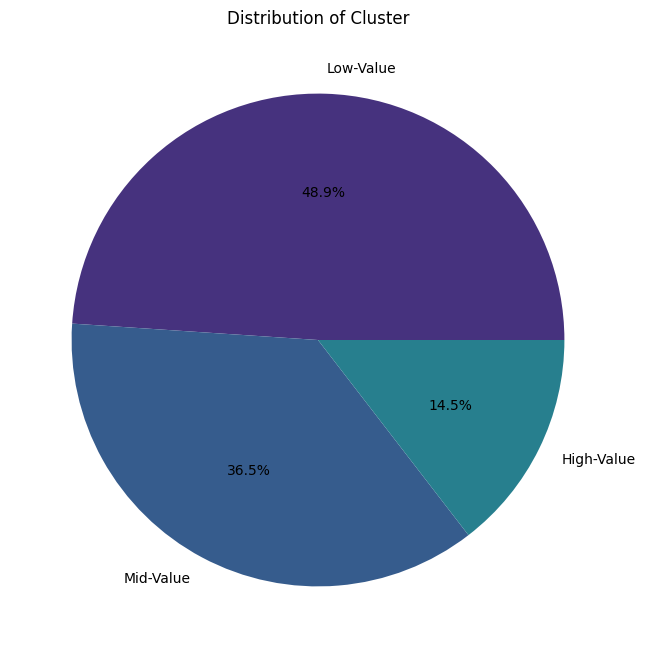

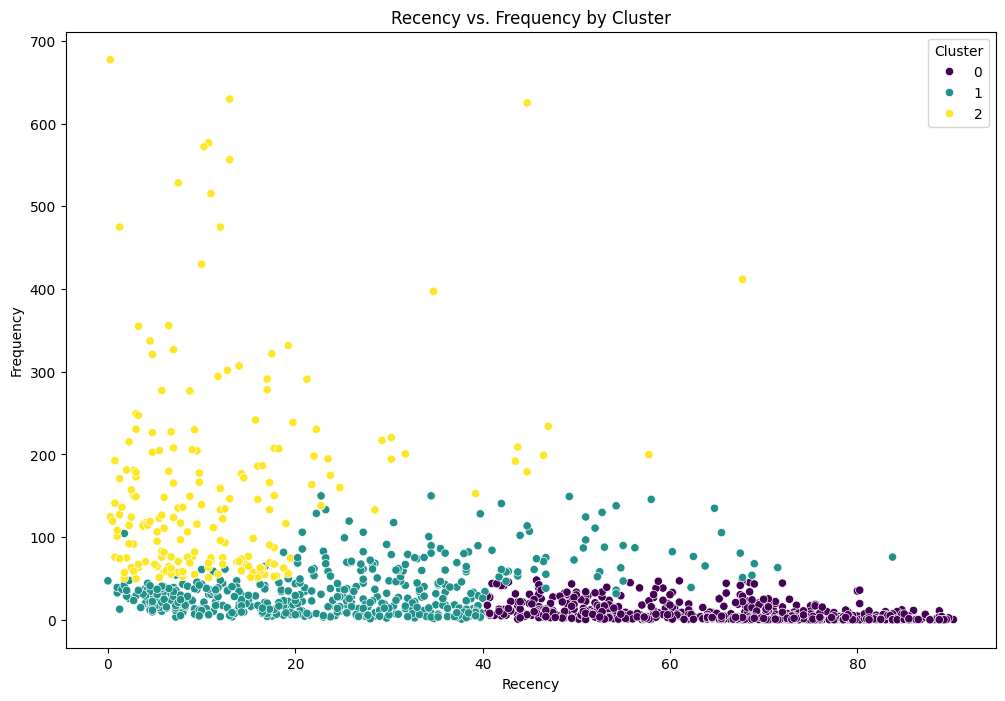

<ipython-input-77-712c41f60624>:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='Cluster', y='Recency', palette='viridis')


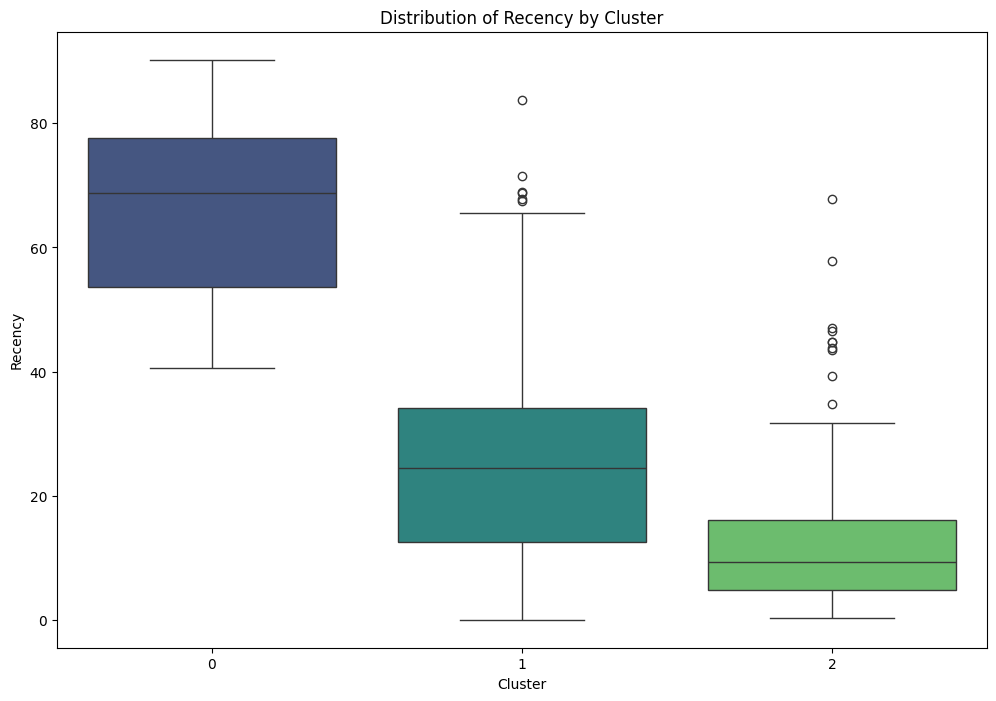

In [ ]:
import seaborn as sns

# 1. Bar Chart
cluster_counts = data['MappedCluster'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=cluster_counts.index, y=cluster_counts.values, palette='viridis')
plt.title('Count of Customers in Each Segment')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.show()

# 2. Pie Chart
plt.figure(figsize=(8, 8))
plt.pie(cluster_counts, labels=cluster_counts.index, autopct='%1.1f%%', colors=sns.color_palette('viridis'))
plt.title('Distribution of Cluster')
plt.show()

# 3. Scatter Plot
plt.figure(figsize=(12, 8))
sns.scatterplot(data=data, x='Recency', y='Frequency', hue='Cluster', palette='viridis')
plt.title('Recency vs. Frequency by Cluster')
plt.xlabel('Recency')
plt.ylabel('Frequency')
plt.show()

# 4. Box Plot
plt.figure(figsize=(12, 8))
sns.boxplot(data=data, x='Cluster', y='Recency', palette='viridis')
plt.title('Distribution of Recency by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Recency')
plt.show()

#For PowerBI Garage Data

In [ ]:
data

,Recency,RecencyCluster,Frequency,FrequencyCluster,Revenue,RevenueCluster,OverallScore,Cluster,MappedCluster
GarageId,,,,,,,,,
AA3539,62.00,1,8.00,0,360.00,0,1,0,Low-Value
AF3356,45.75,1,17.00,0,602.50,0,1,0,Low-Value
AF8522,54.25,1,8.50,0,325.00,0,1,0,Low-Value
AI1156,49.50,1,43.50,0,1622.50,0,1,0,Low-Value
AK2474,54.75,1,8.00,0,280.00,0,1,0,Low-Value
...,...,...,...,...,...,...,...,...,...
RH6974,10.00,3,430.00,3,15100.00,3,9,2,High-Value
RJ0000,12.00,3,475.00,3,17897.50,3,9,2,High-Value
WH4482,0.25,3,677.25,3,23966.25,3,9,2,High-Value


In [ ]:
datavisual = data.reset_index()
datavisual

,GarageId,Recency,RecencyCluster,Frequency,FrequencyCluster,Revenue,RevenueCluster,OverallScore,Cluster,MappedCluster
0,AA3539,62.00,1,8.00,0,360.00,0,1,0,Low-Value
1,AF3356,45.75,1,17.00,0,602.50,0,1,0,Low-Value
2,AF8522,54.25,1,8.50,0,325.00,0,1,0,Low-Value
3,AI1156,49.50,1,43.50,0,1622.50,0,1,0,Low-Value
4,AK2474,54.75,1,8.00,0,280.00,0,1,0,Low-Value
...,...,...,...,...,...,...,...,...,...,...
1315,RH6974,10.00,3,430.00,3,15100.00,3,9,2,High-Value
1316,RJ0000,12.00,3,475.00,3,17897.50,3,9,2,High-Value
1317,WH4482,0.25,3,677.25,3,23966.25,3,9,2,High-Value
1318,XM6230,13.00,3,556.50,3,19842.50,3,9,2,High-Value


In [ ]:
df

,Distributor,ProductName,ProductSKU,ScanDate,UserId,Points,Volume (L),GarageId,UserType,Postcode,Province,District
0,B,Mobil Super AIO - Charcoal,Mobil Super AIO - 7L,2023-11-29,EXL_1692444744991,45,7,AA3539,Owner,72000.0,สุพรรณบุรี,เขตศรีประจันต์
1,B,Mobil Super AIO - Charcoal,Mobil Super AIO - 7L,2023-11-29,EXL_1692444744991,45,7,AA3539,Owner,72000.0,สุพรรณบุรี,เขตศรีประจันต์
2,B,Mobil Super AIO - Charcoal,Mobil Super AIO - 7L,2023-11-29,EXL_1692444744991,45,7,AA3539,Owner,72000.0,สุพรรณบุรี,เขตศรีประจันต์
3,B,Mobil Super AIO - Charcoal,Mobil Super AIO - 7L,2023-11-29,EXL_1692444744991,45,7,AA3539,Owner,72000.0,สุพรรณบุรี,เขตศรีประจันต์
4,B,Mobil Super AIO - Charcoal,Mobil Super AIO - 7L,2023-11-29,EXL_1692444744991,45,7,AA3539,Owner,72000.0,สุพรรณบุรี,เขตศรีประจันต์
...,...,...,...,...,...,...,...,...,...,...,...,...
215651,C,Mobil Super FF,Mobil Super FF 4L - 7L,2023-06-19,EXL_1686836958772,35,6,ZY1293,Owner,57000.0,เชียงราย,เขต
215652,C,Mobil Super FF,Mobil Super FF 4L - 7L,2023-06-19,EXL_1686836958772,35,6,ZY1293,Owner,57000.0,เชียงราย,เขต
215653,C,Mobil Super FF,Mobil Super FF 4L - 7L,2023-06-19,EXL_1686836958772,35,6,ZY1293,Owner,57000.0,เชียงราย,เขต
215654,C,Mobil Super FF,Mobil Super FF 4L - 7L,2023-06-15,EXL_1686836958772,35,6,ZY1293,Owner,57000.0,เชียงราย,เขต


In [ ]:
# Perform the merge on the 'GroupId' column
UpdateData = datavisual.merge(df[['GarageId', 'Province','District','Distributor']], on='GarageId', how='left')
UpdateData

,GarageId,Recency,RecencyCluster,Frequency,FrequencyCluster,Revenue,RevenueCluster,OverallScore,Cluster,MappedCluster,Province,District,Distributor
0,AA3539,62.00,1,8.0,0,360.0,0,1,0,Low-Value,สุพรรณบุรี,เขตศรีประจันต์,B
1,AA3539,62.00,1,8.0,0,360.0,0,1,0,Low-Value,สุพรรณบุรี,เขตศรีประจันต์,B
2,AA3539,62.00,1,8.0,0,360.0,0,1,0,Low-Value,สุพรรณบุรี,เขตศรีประจันต์,B
3,AA3539,62.00,1,8.0,0,360.0,0,1,0,Low-Value,สุพรรณบุรี,เขตศรีประจันต์,B
4,AA3539,62.00,1,8.0,0,360.0,0,1,0,Low-Value,สุพรรณบุรี,เขตศรีประจันต์,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...
215651,ZB1266,1.25,3,475.0,3,15837.5,3,9,2,High-Value,นนทบุรี,เขตบางบัวทอง,A
215652,ZB1266,1.25,3,475.0,3,15837.5,3,9,2,High-Value,นนทบุรี,เขตบางบัวทอง,A
215653,ZB1266,1.25,3,475.0,3,15837.5,3,9,2,High-Value,นนทบุรี,เขตบางบัวทอง,A
215654,ZB1266,1.25,3,475.0,3,15837.5,3,9,2,High-Value,นนทบุรี,เขตบางบัวทอง,A


In [ ]:
Updategrouped_data = UpdateData.drop_duplicates(subset='GarageId')
Updategrouped_data

,GarageId,Recency,RecencyCluster,Frequency,FrequencyCluster,Revenue,RevenueCluster,OverallScore,Cluster,MappedCluster,Province,District,Distributor
0,AA3539,62.00,1,8.00,0,360.00,0,1,0,Low-Value,สุพรรณบุรี,เขตศรีประจันต์,B
32,AF3356,45.75,1,17.00,0,602.50,0,1,0,Low-Value,เชียงใหม่,เขตดอยสะเก็ด,C
100,AF8522,54.25,1,8.50,0,325.00,0,1,0,Low-Value,ชลบุรี,เขตพนัสนิคม,A
134,AI1156,49.50,1,43.50,0,1622.50,0,1,0,Low-Value,อุตรดิตถ์,เขตเมืองอุตรดิตถ์,C
308,AK2474,54.75,1,8.00,0,280.00,0,1,0,Low-Value,สระแก้ว,เขตเมืองสระแก้ว,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...
205201,RH6974,10.00,3,430.00,3,15100.00,3,9,2,High-Value,อุตรดิตถ์,เขตเมืองอุตรดิตถ์,C
206921,RJ0000,12.00,3,475.00,3,17897.50,3,9,2,High-Value,สุโขทัย,เขตเมืองสุโขทัย,C
208821,WH4482,0.25,3,677.25,3,23966.25,3,9,2,High-Value,พิษณุโลก,เขตเมืองพิษณุโลก,C
211530,XM6230,13.00,3,556.50,3,19842.50,3,9,2,High-Value,พังงา,เขตเมืองภูเก็ต,D


In [ ]:
Updategrouped_data.to_csv('Garage CLV Analysis.csv', index=False)

from google.colab import files
files.download('Garage CLV Analysis.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#Data Split for ML Model

In [ ]:
data.value_counts('Cluster')

Cluster
0    646
1    482
2    192
Name: count, dtype: int64

In [ ]:
data.set_index('GarageId', inplace=True)

In [ ]:
data

,Recency,RecencyCluster,Frequency,FrequencyCluster,Revenue,RevenueCluster,OverallScore,Cluster,MappedCluster
GarageId,,,,,,,,,
AA3539,62.00,1,8.00,0,360.00,0,1,0,Low-Value
AF3356,45.75,1,17.00,0,602.50,0,1,0,Low-Value
AF8522,54.25,1,8.50,0,325.00,0,1,0,Low-Value
AI1156,49.50,1,43.50,0,1622.50,0,1,0,Low-Value
AK2474,54.75,1,8.00,0,280.00,0,1,0,Low-Value
...,...,...,...,...,...,...,...,...,...
RH6974,10.00,3,430.00,3,15100.00,3,9,2,High-Value
RJ0000,12.00,3,475.00,3,17897.50,3,9,2,High-Value
WH4482,0.25,3,677.25,3,23966.25,3,9,2,High-Value


In [ ]:
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import classification_report,confusion_matrix
import xgboost as xgb

In [ ]:
X = data.drop(['RecencyCluster','FrequencyCluster','RevenueCluster','OverallScore','Cluster','MappedCluster'],axis=1)
y = data['Cluster']

In [ ]:
X

,Recency,Frequency,Revenue
GarageId,,,
AA3539,62.00,8.00,360.00
AF3356,45.75,17.00,602.50
AF8522,54.25,8.50,325.00
AI1156,49.50,43.50,1622.50
AK2474,54.75,8.00,280.00
...,...,...,...
RH6974,10.00,430.00,15100.00
RJ0000,12.00,475.00,17897.50
WH4482,0.25,677.25,23966.25


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
X_train

,Recency,Frequency,Revenue
GarageId,,,
YQ6500,16.00,145.75,4566.25
PZ0125,9.50,45.75,2287.50
XJ5500,46.75,11.50,407.50
LE1829,70.00,2.75,98.75
DQ8364,6.75,24.00,561.25
...,...,...,...
HJ7693,2.25,92.00,2942.50
QD2450,6.25,59.50,2082.50
YO5211,17.75,207.50,6098.75


In [ ]:
X_test

,Recency,Frequency,Revenue
GarageId,,,
QB6049,70.50,20.00,852.50
RE9433,78.50,1.75,35.00
LZ3104,69.75,4.25,145.00
FD9566,53.50,18.25,642.50
VZ7122,5.50,204.75,7640.00
...,...,...,...
PE1371,54.50,1.00,40.00
AS7269,39.00,33.50,822.50
MC1858,75.00,10.75,318.75


In [ ]:
model = xgb.XGBClassifier(max_depth=5,learning_rate=0.1)
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [ ]:
pred = model.predict(X_test)

In [ ]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       186
           1       0.99      0.99      0.99       150
           2       0.98      0.97      0.97        60

    accuracy                           0.99       396
   macro avg       0.99      0.99      0.99       396
weighted avg       0.99      0.99      0.99       396

